# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [43]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
dict = {'setosa': 1, 'versicolor': 2,'virginica': 3 }
data['species'] = data['species'].map(dict)

In [46]:
X = data.drop('species', axis=1)
y = data.species
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64


# Algorithm for KNN

Things that need to happen:

1) Function to calculate distance between points

2) Calculate distance between a test point and all known data points

3) Sort distance measurements to see closest points (nearest neighbors)

4) Use labels of those closest points to predict label of test point

5) Perform steps 1 - 4 for all test data points

## Calculate distance between two points (Euclidian distance)

In [47]:
def euclidian_distance(a, b):
    
    dim = len(a)
    distance = 0
    
    for d in range(dim):
        distance += (a[d] - b[d])**2
        
    distance = distance**(1/2)
    return distance

euclidian_distance(a=X.iloc[0], b=X.iloc[1])

0.5385164807134502

## Calculate distance between a test point and all known data points

In [48]:
test_pt = [4.8, 2.7, 2.5, 0.7]
distances = []

for i in X.index:
    distances.append(euclidian_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['Euclidian distance'])
df_dists.head()

,Euclidian distance
0,1.479865
1,1.249000
2,1.396424
3,1.204159
4,1.519868


## Sort distance measurements to see the closest points (nearest neighbors)

In [49]:
df_nn = df_dists.sort_values(by=['Euclidian distance'], axis=0)[:5]
df_nn

,Euclidian distance
98,0.734847
57,0.911043
93,0.964365
24,1.048809
23,1.063015


## Use labels of those closest points to predict label of test point

In [50]:
y[df_nn.index]

98    2
57    2
93    2
24    1
23    1
Name: species, dtype: int64

### Create counter object to track the labels

In [51]:
from collections import Counter
counter = Counter(y[df_nn.index])

# Get most common label of all the nearest neighbors
print(counter)
print(counter.most_common()[0][0])

Counter({2: 3, 1: 2})
2


## Splitting the data into training and test sets

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the KNN Classifier

In [54]:
def knn_predict(X_train, X_test, y_train, y_test, k):
    
    y_pred= []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclidian_distance(test_point, train_point)
            distances.append(distance)
        
        df_dists = pd.DataFrame(data=distances, columns=['distance'], index=y_train.index)
        df_nn = df_dists.sort_values(by=['distance'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])
        prediction = counter.most_common()[0][0]
        y_pred.append(prediction)
        
    return y_pred

# Predicting the result

In [55]:
y_pred = knn_predict(X_train, X_test, y_train, y_test, k=5)
print(y_pred)

[3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3]


# Model Evaluation

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9736842105263158


# Plotting the accuracies for different values of K

In [57]:
accuracies = []

for k in range(1,100):
    y_pred = knn_predict(X_train, X_test, y_train, y_test, k)
    accuracies.append(accuracy_score(y_test, y_pred))

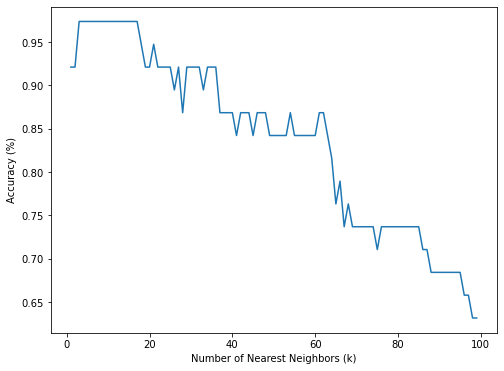

In [58]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('Number of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');